In [1]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Date/time processing
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

# Forecasting
# from prophet import Prophet

# Machine learning (for optional regression/classification)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Clustering (optional)
from sklearn.cluster import KMeans

# Stats and warnings
# import statsmodels.api as sm
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
df = pd.read_csv("weatherHistory.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,0,1014.98,Mostly cloudy throughout the day.


In [3]:
# Preprocessing the Data
df.replace('?', np.nan, inplace=True)
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("\nUpdated DataFrame info:")
print(df.info())

Missing values per column:
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 

In [4]:
# Keeping the data from the latest year only
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df[df['Formatted Date'].dt.year == 2016].copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 87527 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            8409 non-null   datetime64[ns, UTC]
 1   Summary                   8409 non-null   object             
 2   Precip Type               8409 non-null   object             
 3   Temperature (C)           8409 non-null   float64            
 4   Apparent Temperature (C)  8409 non-null   float64            
 5   Humidity                  8409 non-null   float64            
 6   Wind Speed (km/h)         8409 non-null   float64            
 7   Wind Bearing (degrees)    8409 non-null   int64              
 8   Visibility (km)           8409 non-null   float64            
 9   Loud Cover                8409 non-null   int64              
 10  Pressure (millibars)      8409 non-null   float64            
 11  Daily Summary    

In [5]:
# Cleaning the data on anomaly values
df = df[df['Temperature (C)'].between(-50, 50)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 87527 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            8409 non-null   datetime64[ns, UTC]
 1   Summary                   8409 non-null   object             
 2   Precip Type               8409 non-null   object             
 3   Temperature (C)           8409 non-null   float64            
 4   Apparent Temperature (C)  8409 non-null   float64            
 5   Humidity                  8409 non-null   float64            
 6   Wind Speed (km/h)         8409 non-null   float64            
 7   Wind Bearing (degrees)    8409 non-null   int64              
 8   Visibility (km)           8409 non-null   float64            
 9   Loud Cover                8409 non-null   int64              
 10  Pressure (millibars)      8409 non-null   float64            
 11  Daily Summary    

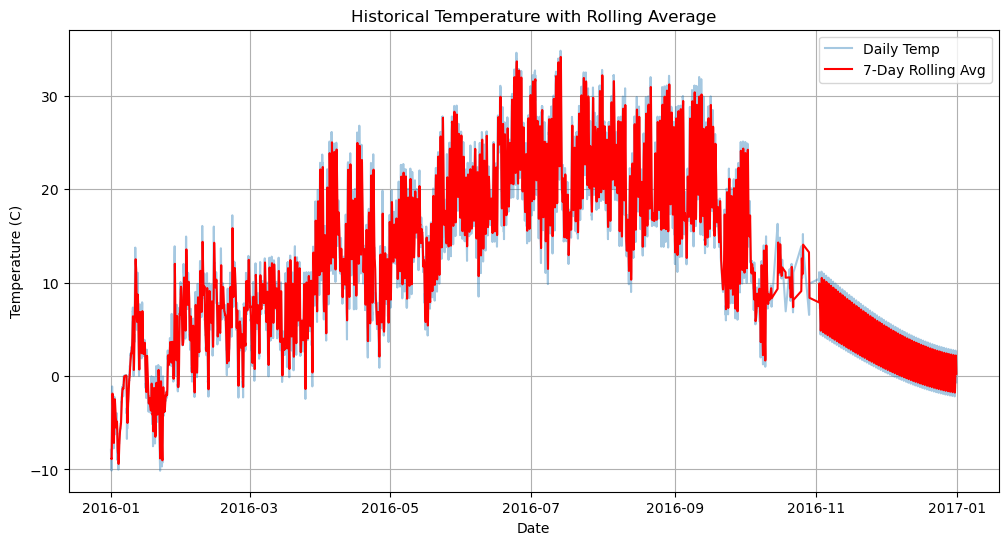

In [6]:
# Rolling Average Visualization
import matplotlib.pyplot as plt

df.set_index('Formatted Date', inplace=True)
df['Rolling Mean'] = df['Temperature (C)'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Temperature (C)'], label='Daily Temp', alpha=0.4)
plt.plot(df['Rolling Mean'], label='7-Day Rolling Avg', color='red')
plt.legend()
plt.title("Historical Temperature with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()


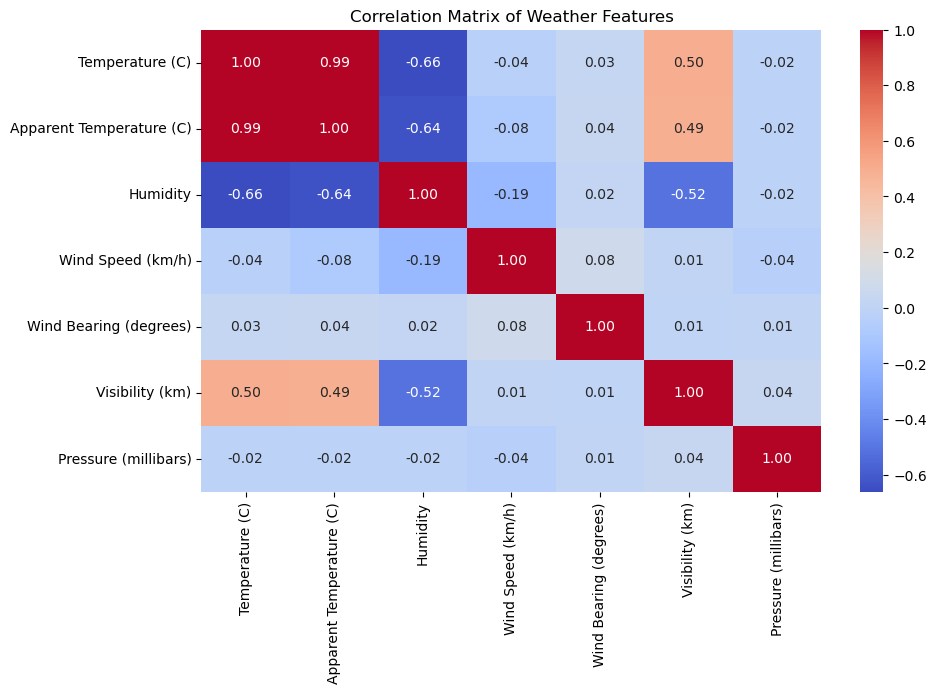

In [ ]:
#  Correlation Heatmap --------
plt.figure(figsize=(10, 6))
numerical_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                  'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Features')
plt.show()

C:\Users\Orges Sejdiu\AppData\Local\Temp\ipykernel_20084\3029324913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Temperature (C)', data=df,


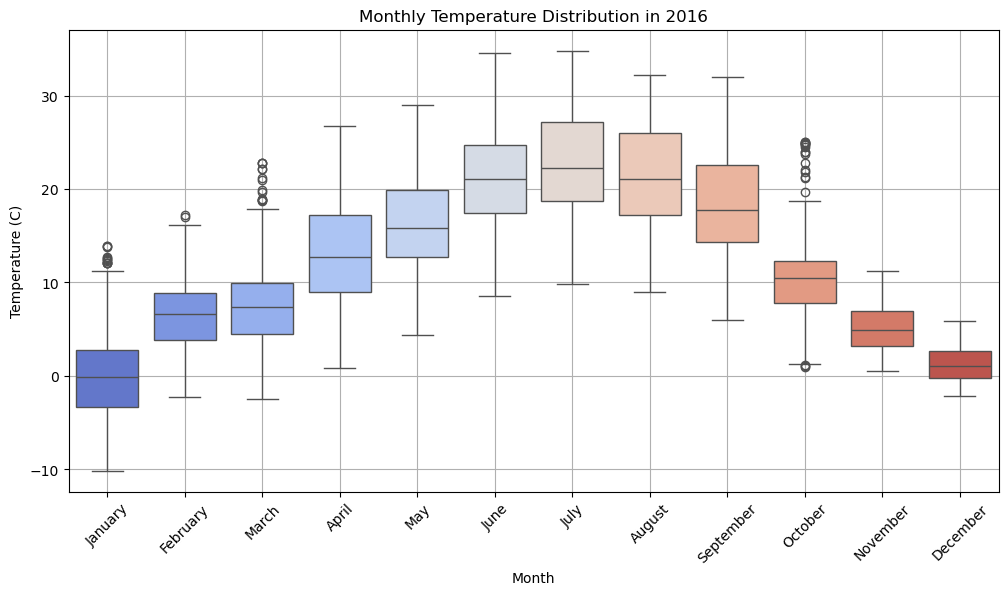

In [9]:
# Seasonal Temperature Trends --------
df['Month'] = df.index.month_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature (C)', data=df,
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'],
            palette='coolwarm')
plt.title('Monthly Temperature Distribution in 2016')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1200x1000 with 0 Axes>

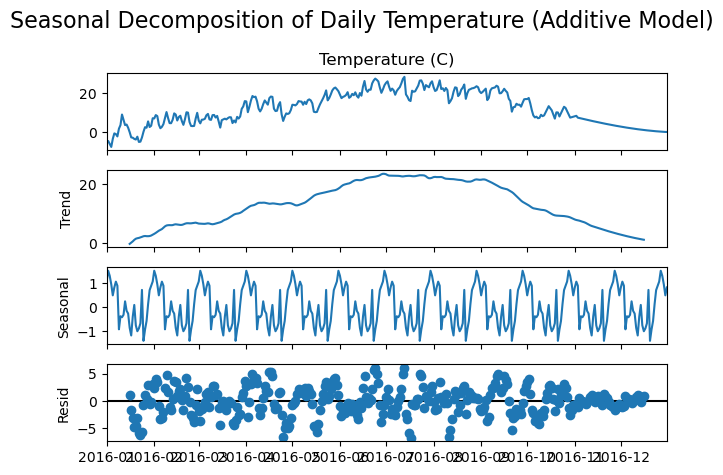

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to daily mean
daily_temp = df['Temperature (C)'].resample('D').mean()

# Fill missing values
daily_temp = daily_temp.interpolate()

# Decompose the series
result = seasonal_decompose(daily_temp, model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(12, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Daily Temperature (Additive Model)', fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.3/13.3 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 4.2/13.3 MB 10.5 MB/s eta 0:00:01
   --------------------- ------------------ 7.1/13.3 MB 11.2 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.3 MB 11.4 MB/s eta 0:00:01
   ----------------------------------- ---- 11.8/13.3 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/954.8 kB ? eta -:--:--
   --------------------------------------- 954.8/954.8 kB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


23:27:53 - cmdstanpy - INFO - Chain [1] start processing
23:27:57 - cmdstanpy - INFO - Chain [1] done processing


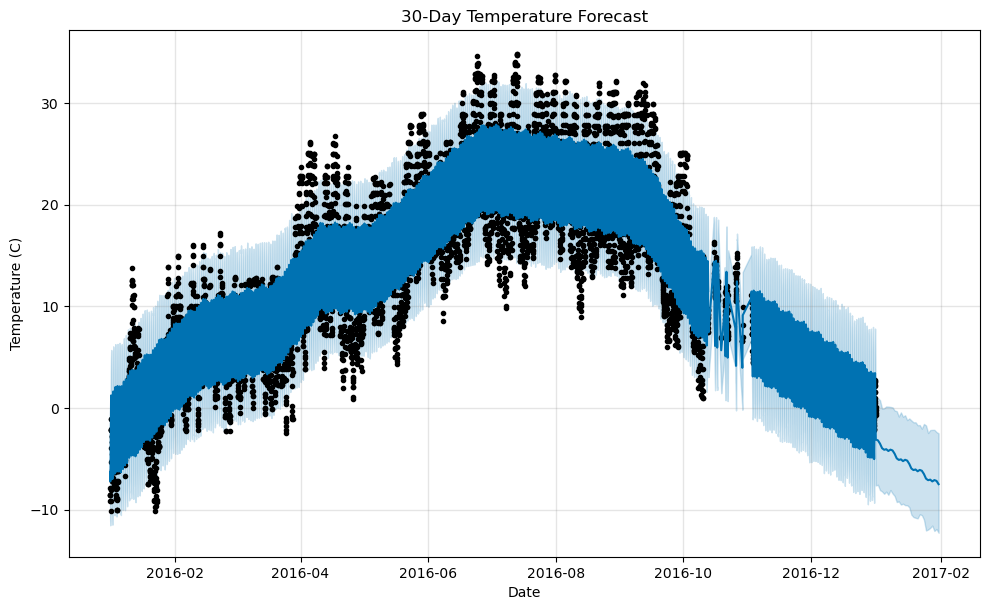

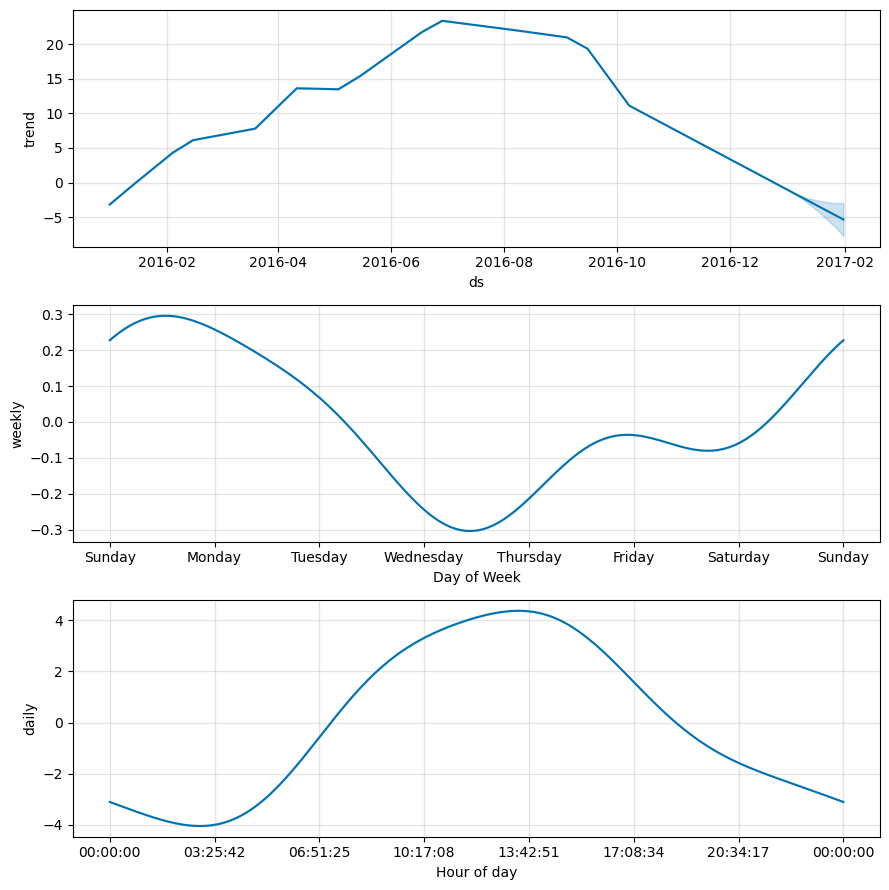

In [14]:
from prophet import Prophet

# Reset index to access 'Formatted Date'
df_reset = df.reset_index()

# Daily average temperature
daily_temp_df = df_reset[['Formatted Date', 'Temperature (C)']].copy()
daily_temp_df = daily_temp_df.rename(columns={'Formatted Date': 'ds', 'Temperature (C)': 'y'})

# Remove timezone
daily_temp_df['ds'] = daily_temp_df['ds'].dt.tz_convert(None)

# Resample to daily average to ensure consistent frequency
daily_temp_df = daily_temp_df.groupby('ds').mean().reset_index()

# Create and fit the model
model = Prophet()
model.fit(daily_temp_df)

# Create future dates (next 30 days)
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("30-Day Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()

# Plot components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reset index to get 'Formatted Date' back as a column
df_clustering = df.reset_index()

# Group by day and take average (if needed)
daily_weather = df_clustering.groupby(df_clustering['Formatted Date'].dt.date).agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
    'Wind Speed (km/h)': 'mean',
    'Visibility (km)': 'mean'
}).reset_index()

daily_weather.rename(columns={'Formatted Date': 'Date'}, inplace=True)

# Normalize the features
scaler = StandardScaler()
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']
scaled_features = scaler.fit_transform(daily_weather[features])


In [16]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to DataFrame
daily_weather['Cluster'] = clusters


c:\Users\Orges Sejdiu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


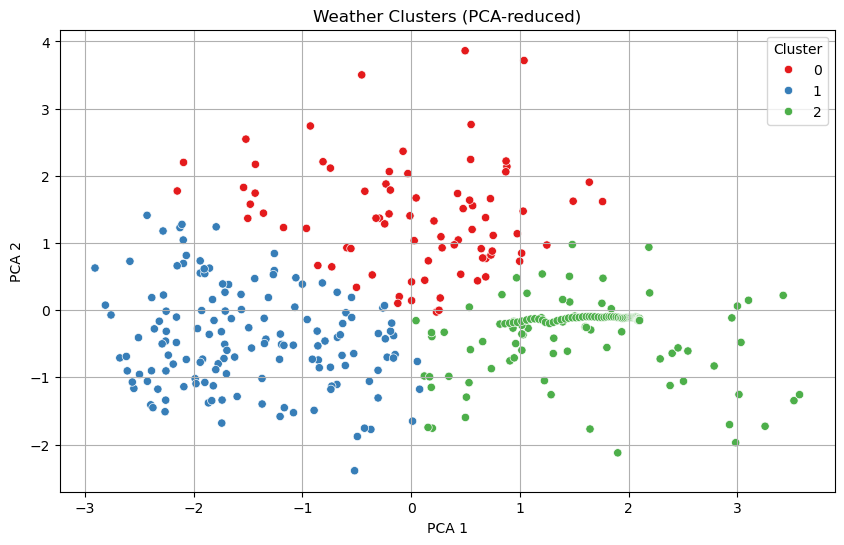

In [17]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=daily_weather['Cluster'], palette='Set1')
plt.title("Weather Clusters (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [18]:
# Average weather per cluster
cluster_summary = daily_weather.groupby('Cluster')[features].mean()
print(cluster_summary)


         Temperature (C)  Humidity  Wind Speed (km/h)  Visibility (km)
Cluster                                                               
0              10.632935  0.756408          16.331437        12.695750
1              19.431332  0.660768           8.085701        13.998281
2               4.996948  0.873261          10.092776         7.884339


In [19]:
# Recalculate daily average temperature
df_anomaly = df.reset_index()
daily_temp = df_anomaly.groupby(df_anomaly['Formatted Date'].dt.date)['Temperature (C)'].mean().reset_index()
daily_temp.columns = ['Date', 'Temperature (C)']


In [20]:
from scipy.stats import zscore

# Calculate Z-scores
daily_temp['Z-Score'] = zscore(daily_temp['Temperature (C)'])

# Define anomalies (e.g., |Z| > 2)
threshold = 2
daily_temp['Anomaly'] = daily_temp['Z-Score'].apply(lambda z: 'Yes' if abs(z) > threshold else 'No')


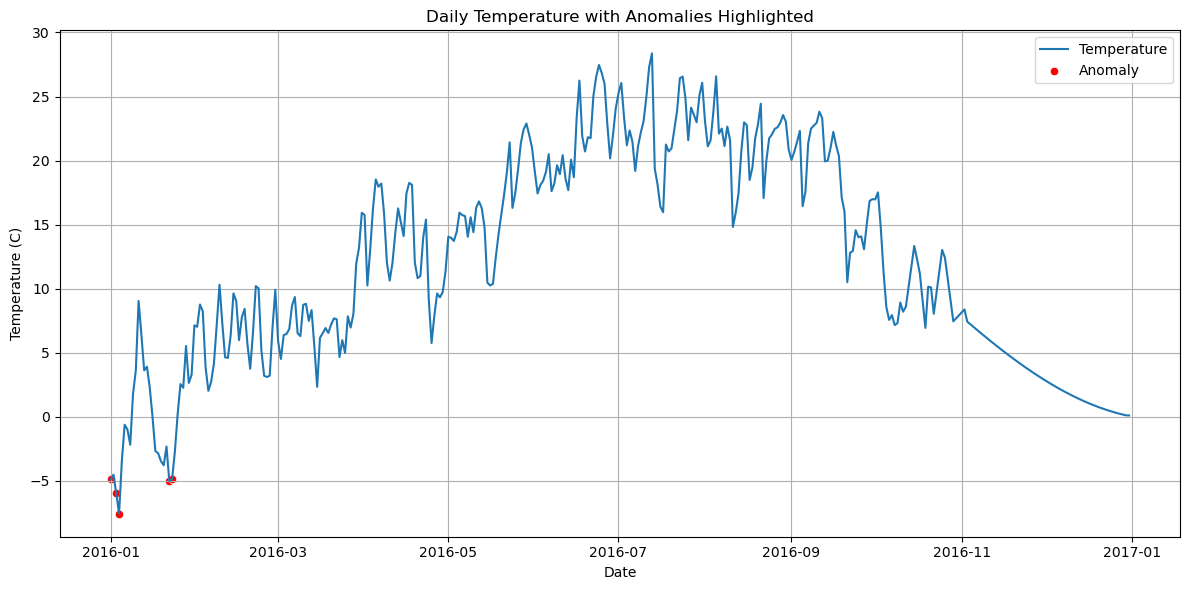

In [21]:
# Plot anomalies on temperature graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_temp, x='Date', y='Temperature (C)', label='Temperature')
sns.scatterplot(data=daily_temp[daily_temp['Anomaly'] == 'Yes'], x='Date', y='Temperature (C)', color='red', label='Anomaly')
plt.title("Daily Temperature with Anomalies Highlighted")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# See which days were flagged as anomalies
anomaly_days = daily_temp[daily_temp['Anomaly'] == 'Yes']
print(anomaly_days)


          Date  Temperature (C)   Z-Score Anomaly
0   2016-01-01        -4.883102 -2.023838     Yes
2   2016-01-03        -5.978472 -2.154477     Yes
3   2016-01-04        -7.556019 -2.342622     Yes
21  2016-01-22        -5.005556 -2.038443     Yes
22  2016-01-23        -4.854167 -2.020387     Yes


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Reset index and filter columns
df_ml = df.reset_index()
df_ml = df_ml[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
               'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)', 'Summary']].copy()

# Encode the categorical target
label_encoder = LabelEncoder()
df_ml['SummaryEncoded'] = label_encoder.fit_transform(df_ml['Summary'])


In [24]:
X = df_ml.drop(['Summary', 'SummaryEncoded'], axis=1)
y = df_ml['SummaryEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

labels = np.unique(y_test)  # Only use the classes present in y_test
target_names = label_encoder.inverse_transform(labels)

print("Classification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))



Classification Report:
                          precision    recall  f1-score   support

Breezy and Mostly Cloudy       0.00      0.00      0.00         2
     Breezy and Overcast       0.82      0.82      0.82        11
Breezy and Partly Cloudy       0.00      0.00      0.00         1
                   Clear       0.56      0.31      0.40        88
                 Drizzle       1.00      0.83      0.91         6
                   Foggy       1.00      1.00      1.00        62
 Humid and Mostly Cloudy       0.00      0.00      0.00         2
              Light Rain       0.80      0.80      0.80         5
           Mostly Cloudy       0.68      0.71      0.69       613
                Overcast       0.67      0.59      0.63       280
           Partly Cloudy       0.71      0.76      0.74       611
                    Rain       0.00      0.00      0.00         1

                accuracy                           0.70      1682
               macro avg       0.52      0.49      

c:\Users\Orges Sejdiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Orges Sejdiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Orges Sejdiu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


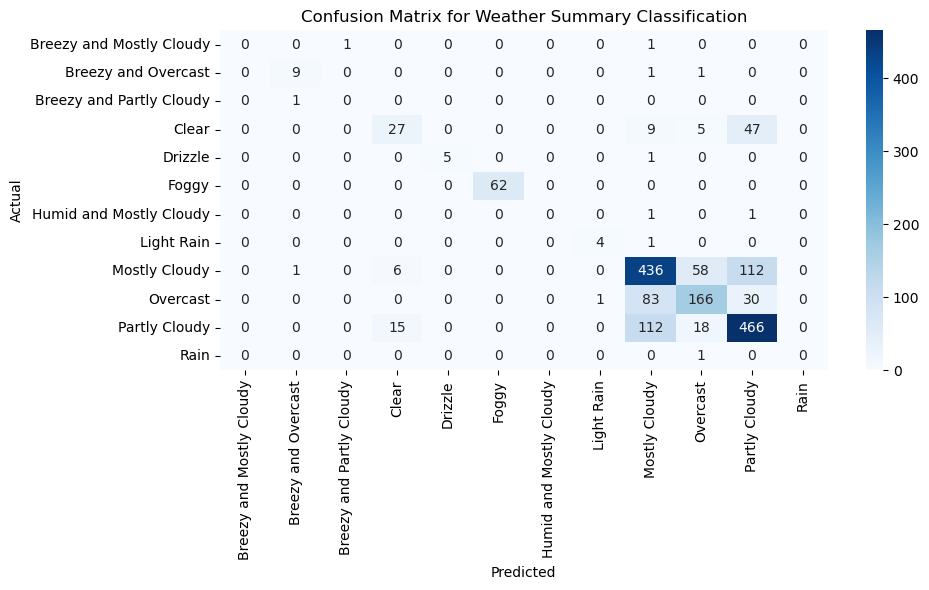

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=labels), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Weather Summary Classification")
plt.tight_layout()
plt.show()


In [30]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
